<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
# Code hider, source: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/
from IPython.display import HTML

HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

In [2]:
%%javascript
// ToC script
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [24]:
%matplotlib inline

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from feature_extract import comm_feature_extract, build_nan_features, build_emc_features

plt.rcParams["figure.figsize"] = [12,6]
pd.options.display.float_format = '{:,.3f}'.format

# Zimmerman paper notes

[Min et al: Mining Smartphone Data to Classify Life-Facets of Social Relationships](https://dl.acm.org/citation.cfm?id=2441810)

[pdf](https://disco.ethz.ch/courses/fs14/seminar/paper/Philipp/4.pdf)


## Mobile communication pattern features

- intensity and regularity
    - \# days {call, sms} / days logged
    - {avg, std} {out, in} {call, sms} per day
- temporal tendency
    - \# {call, sms} at {time of day, day of week} / total
- channel selection
    - out comm / total comm
    - \# calls / total comm
- avoidance
    - missed calls / {out, in} calls
    - in SMS / out SMS
    
**note**: total in this context is in terms of individual  

In [4]:
# load data
comm_df = pickle.load(open("../data/top_10_contacts.df", "rb"))
emm_df = pickle.load(open("../data/emm_raw.df", "rb"))

In [5]:
# build features
comm_features = comm_feature_extract(comm_df, emm_df)

/mnt/c/Users/Tony Liu/Documents/Github/relationship-prediction/feature_extract/feature_extract.py:152: RuntimeWarning: invalid value encountered in sqrt
  temp_df[std_name] = np.sqrt(temp_df['total_ssum'] / (temp_df['total_days'] - 1))


In [6]:
# for unit testing
# test_df = comm_df.loc[comm_df['combined_hash'].isin(['1002060a7f4fe408f8137f12982e5d64cf34693',
#  '10413044ad5f1183e38f5ddf17259326e976231'])]

# display(test_df)
# pickle.dump(test_df, open('test_comm.df', 'wb'), -1)

# emm_df.head()

# test_emm = emm_df.loc[emm_df['pid'].isin(['1002060', '1041304'])]

# pickle.dump(test_emm, open("test_emm.df", "wb"), -1)

# Regularity: comm days / total days ratio

Features:
- `total_calls`
- `total_sms`
- `total_call_days`
- `total_sms_days`
- `reg_call`: regularity of calls, total_call_days / total_days
- `reg_sms`: regularity of sms, total_sms_days / total_days
- `reg_comm`: regularity of communication, total_comm_days / total_days

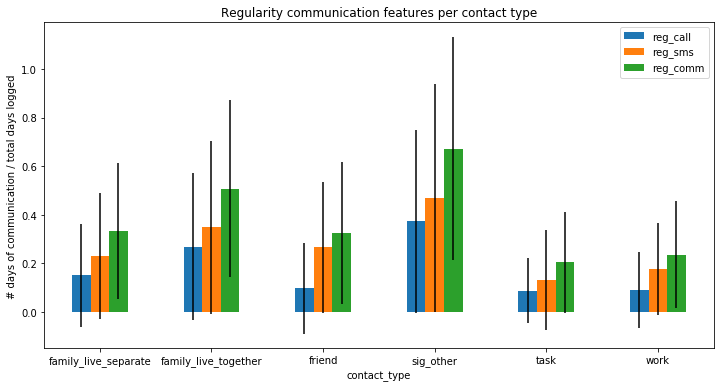

In [33]:
reg_feature_mean = comm_features.groupby('contact_type')[['reg_call', 'reg_sms', 'reg_comm']].mean()
reg_feature_std = comm_features.groupby('contact_type')[['reg_call', 'reg_sms', 'reg_comm']].std()

reg_feature_mean.plot.bar(rot=0, yerr=reg_feature_std)
plt.title("Regularity communication features per contact type")
plt.ylabel("# days of communication / total days logged")
plt.show()

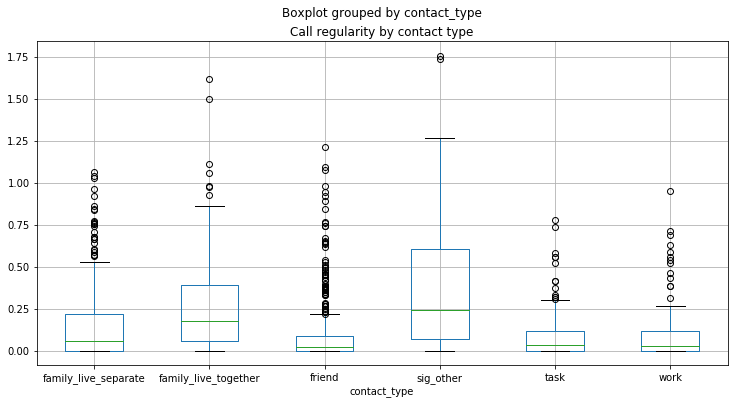

In [57]:
comm_features.boxplot(column='reg_call', by='contact_type')
plt.title("Call regularity by contact type")
plt.show()

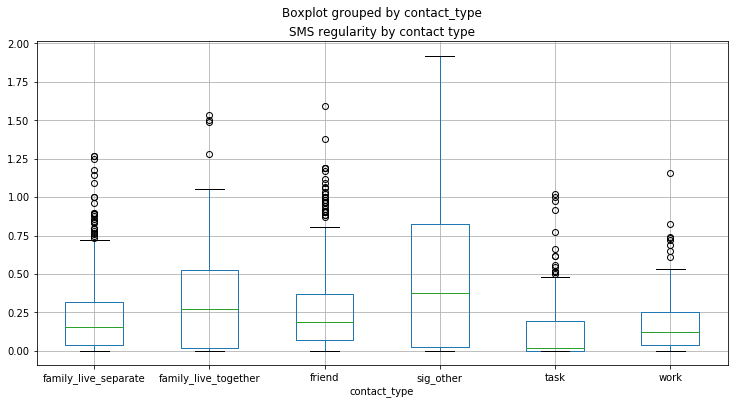

In [56]:
comm_features.boxplot(column='reg_sms', by='contact_type')
plt.title("SMS regularity by contact type")
plt.show()

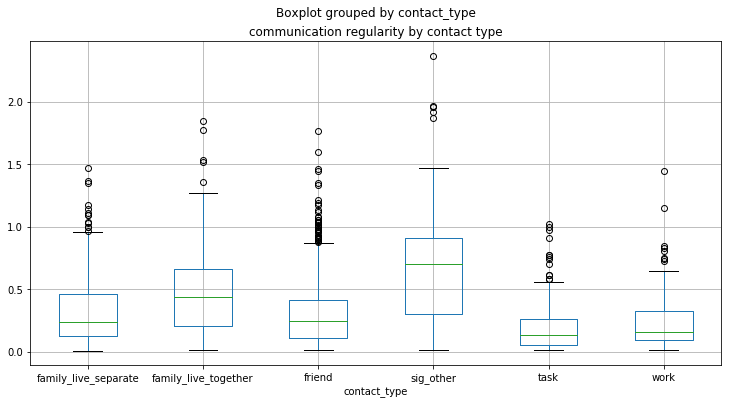

In [55]:
comm_features.boxplot(column='reg_comm', by='contact_type')
plt.title("communication regularity by contact type")
plt.show()

# Temporal tendency: time of day, day of week

Features:
- `time_of_day_{0-5}_{call, sms}`: # {call, sms} at time of day / total
- `day_{0-6}_{call, sms}`: # {call, sms} at day of week / total

## Temporal tendency: SMS

In [8]:
sms_features = comm_features.loc[comm_features['total_sms'] > 0]
time_of_day_sms = ["time_of_day_{}_sms".format(x) for x in range(6)]
day_of_week_sms = ["day_{}_sms".format(x) for x in range(7)]

time_day_sms_mean = sms_features.groupby('contact_type')[time_of_day_sms].mean().T
display(time_day_sms_mean)

day_wk_sms_mean = sms_features.groupby('contact_type')[day_of_week_sms].mean().T
display(day_wk_sms_mean)

contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
time_of_day_0_sms,0.024,0.043,0.040,0.045,0.020,0.044
time_of_day_1_sms,0.024,0.013,0.023,0.027,0.031,0.033
time_of_day_2_sms,0.181,0.181,0.176,0.199,0.311,0.236
time_of_day_3_sms,0.277,0.283,0.256,0.281,0.321,0.267
time_of_day_4_sms,0.301,0.284,0.307,0.284,0.213,0.290
time_of_day_5_sms,0.193,0.195,0.198,0.164,0.103,0.129


contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
day_0_sms,0.111,0.136,0.122,0.157,0.139,0.170
day_1_sms,0.139,0.158,0.132,0.165,0.155,0.137
day_2_sms,0.124,0.137,0.140,0.148,0.164,0.167
day_3_sms,0.151,0.130,0.150,0.172,0.161,0.146
day_4_sms,0.184,0.160,0.186,0.150,0.162,0.191
day_5_sms,0.150,0.140,0.143,0.121,0.142,0.099
day_6_sms,0.140,0.138,0.127,0.088,0.076,0.090


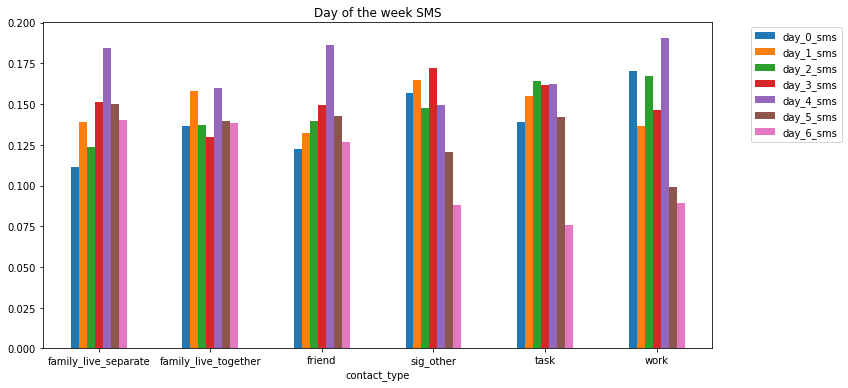

In [75]:
day_wk_sms_mean.T.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Day of the week SMS")
plt.show()

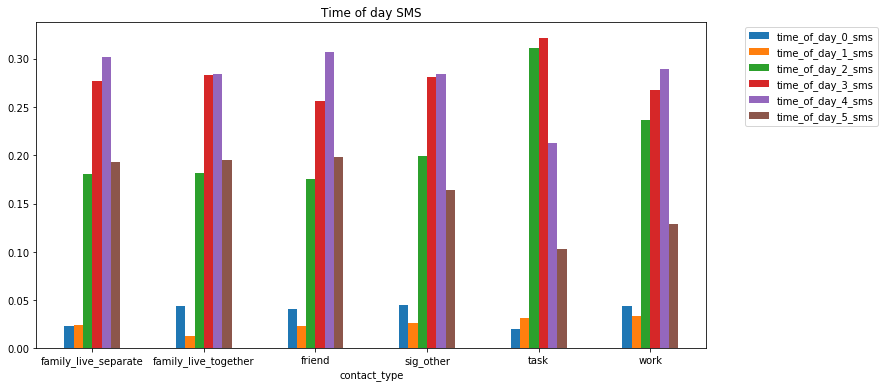

In [74]:
time_day_sms_mean.T.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Time of day SMS")
plt.show()

## Temporal tendency: calls

In [9]:
call_features = comm_features.loc[comm_features['total_calls'] > 0]
time_of_day_calls = ["time_of_day_{}_calls".format(x) for x in range(6)]
day_of_week_calls = ["day_{}_calls".format(x) for x in range(7)]

time_day_calls_mean = call_features.groupby('contact_type')[time_of_day_calls].mean().T
display(time_day_calls_mean)

day_wk_calls_mean = call_features.groupby('contact_type')[day_of_week_calls].mean().T
display(day_wk_calls_mean)

contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
time_of_day_0_calls,0.005,0.029,0.025,0.030,0.015,0.064
time_of_day_1_calls,0.013,0.024,0.017,0.024,0.016,0.031
time_of_day_2_calls,0.173,0.164,0.157,0.146,0.291,0.288
time_of_day_3_calls,0.327,0.257,0.252,0.297,0.365,0.298
time_of_day_4_calls,0.349,0.357,0.370,0.363,0.216,0.247
time_of_day_5_calls,0.132,0.170,0.179,0.140,0.097,0.072


contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
day_0_calls,0.124,0.155,0.129,0.118,0.184,0.199
day_1_calls,0.124,0.125,0.108,0.171,0.167,0.183
day_2_calls,0.149,0.152,0.159,0.145,0.162,0.184
day_3_calls,0.144,0.142,0.177,0.166,0.151,0.149
day_4_calls,0.170,0.151,0.177,0.170,0.181,0.145
day_5_calls,0.149,0.153,0.141,0.126,0.071,0.070
day_6_calls,0.140,0.121,0.110,0.104,0.084,0.071


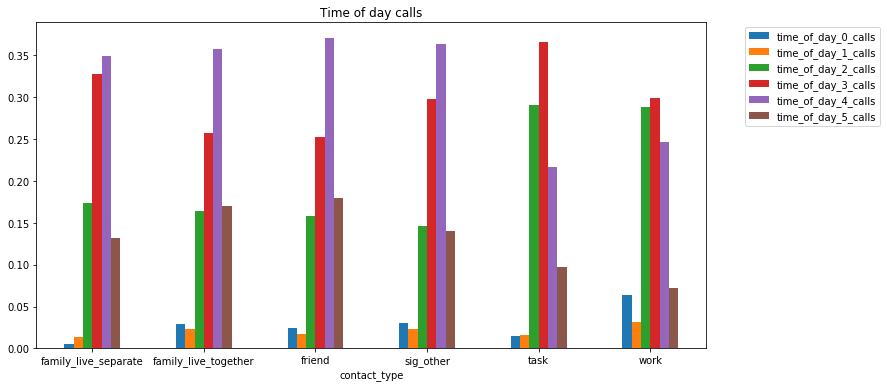

In [80]:
#time_day_calls_std = call_features.groupby('contact_type')[time_of_day_calls].std()
time_day_calls_mean.T.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Time of day calls")
plt.show()

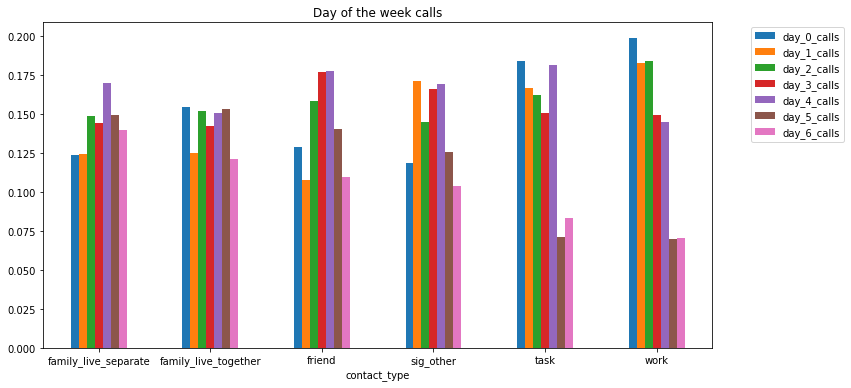

In [81]:
day_wk_calls_mean.T.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Day of the week calls")
plt.show()

# Channel selection: outgoing ratio, call/text ratio

Features created:
- `out_comm`: out comm / total comm
- `call_tendency`: call count / total comm

Note on interpretation: a lower call tendency indicates a higher text tendency, and vice versa

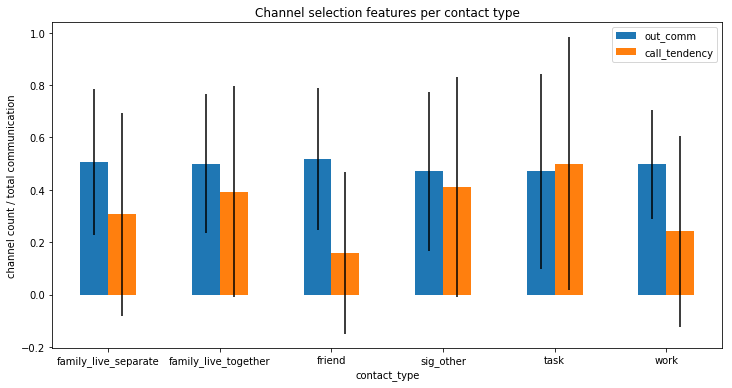

In [54]:
channel_select_mean = comm_features.groupby('contact_type')[['out_comm', 'call_tendency']].mean()
channel_select_std = comm_features.groupby('contact_type')[['out_comm', 'call_tendency']].std()
channel_select_mean.plot.bar(rot=0, yerr=channel_select_std)
plt.title("Channel selection features per contact type")
plt.ylabel("channel count / total communication")
plt.show()

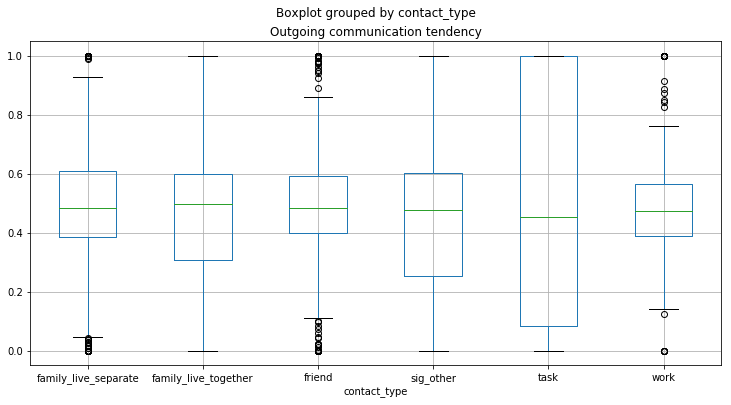

In [61]:
comm_features.boxplot(column='out_comm', by='contact_type')
plt.title("Outgoing communication tendency")
plt.show()

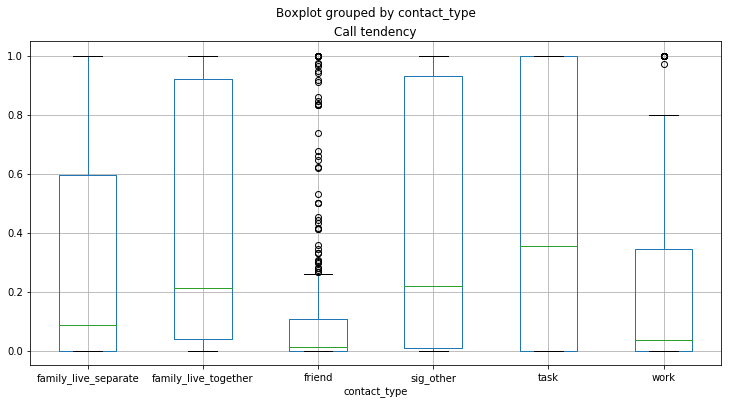

In [60]:
comm_features.boxplot(column='call_tendency', by='contact_type')
plt.title("Call tendency")
plt.show()

# Intensity: mean, std of call, sms

Features created:
- {mean, std} {out, in} {call, sms} per study day

In [11]:
intensity_sms_mean = sms_features.groupby('contact_type')[['mean_in_sms', 'std_in_sms', 'mean_out_sms', 'std_out_sms']].mean().T
display(intensity_sms_mean)

intensity_call_mean = call_features.groupby('contact_type')[['mean_in_call', 'std_in_call', 'mean_out_call', 'std_out_call']].mean().T
display(intensity_call_mean)

contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
mean_in_sms,1.220,2.078,1.750,6.082,2.221,1.054
std_in_sms,2.209,2.749,2.991,4.916,2.542,1.959
mean_out_sms,1.153,2.212,1.744,6.112,2.741,0.918
std_out_sms,2.064,2.777,2.993,5.244,2.956,1.896


contact_type,family_live_separate,family_live_together,friend,sig_other,task,work
mean_in_call,0.160,0.264,0.112,0.477,0.085,0.136
std_in_call,0.318,0.439,0.248,0.628,0.162,0.317
mean_out_call,0.224,0.373,0.170,0.809,0.188,0.190
std_out_call,0.453,0.611,0.386,1.069,0.607,0.453


# Avoidance: missed calls, in/out ratios

Features created:
- `missed_{in, out}_calls`: missed call / {in, out} calls
- `in_out_sms`: in texts / out texts

In [12]:
channel_select_mean = comm_features.groupby('contact_type')[['missed_in_calls', 'missed_out_calls', 'in_out_sms']].mean()
display(channel_select_mean)

,missed_in_calls,missed_out_calls,in_out_sms
contact_type,,,
family_live_separate,0.592,0.424,1.515
family_live_together,0.722,0.593,2.454
friend,0.829,0.677,1.114
sig_other,0.553,0.525,2.236
task,1.254,0.602,3.436
work,0.579,0.431,1.182


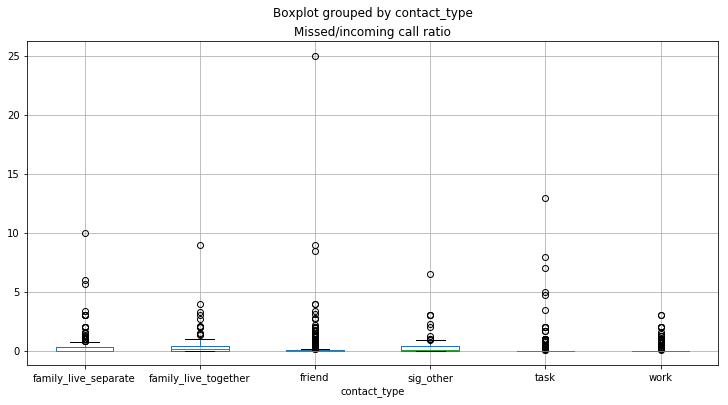

In [63]:
comm_features.boxplot(column='missed_in_calls', by='contact_type')
plt.title("Missed/incoming call ratio")
plt.show()

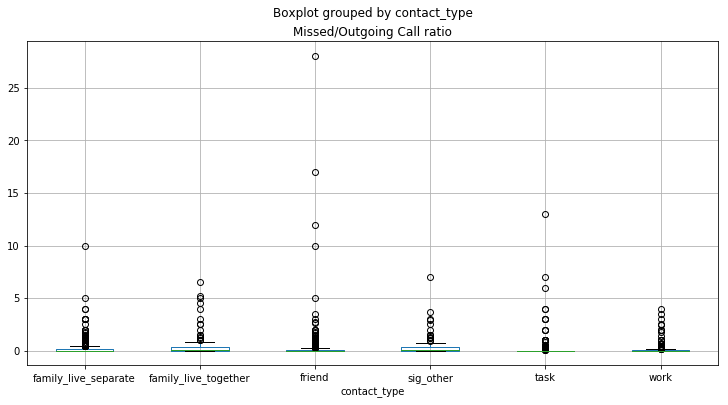

In [65]:
comm_features.boxplot(column='missed_out_calls', by='contact_type')
plt.title("Missed/Outgoing Call ratio")
plt.show()

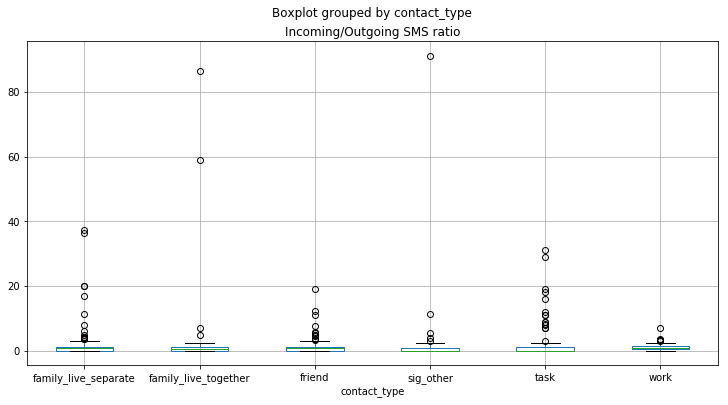

In [62]:
comm_features.boxplot(column='in_out_sms', by='contact_type')
plt.title("Incoming/Outgoing SMS ratio")
plt.show()

# NaN imputation

- NaNs as a result of divide by zeros are filled with zero, with an additional indicator column for the feature

In [13]:
print("Features with NaN values")
display(comm_features.isnull().any())

Features with NaN values


pid                    False
combined_hash          False
total_comms            False
total_comm_days        False
contact_type           False
total_calls            False
total_sms              False
total_sms_days         False
total_call_days        False
total_days             False
reg_call               False
reg_sms                False
reg_comm               False
time_of_day_0_calls     True
time_of_day_1_calls     True
time_of_day_2_calls     True
time_of_day_3_calls     True
time_of_day_4_calls     True
time_of_day_5_calls     True
day_0_calls             True
day_1_calls             True
day_2_calls             True
day_3_calls             True
day_4_calls             True
day_5_calls             True
day_6_calls             True
time_of_day_0_sms       True
time_of_day_1_sms       True
time_of_day_2_sms       True
time_of_day_3_sms       True
time_of_day_4_sms       True
time_of_day_5_sms       True
day_0_sms               True
day_1_sms               True
day_2_sms     

In [14]:
comm_features = build_nan_features(comm_features)

# Contact EMA responses

In [22]:
# TODO move into python module
emc_all = pickle.load(open('../data/emc_all.df', 'rb'))
hash_dict = pickle.load(open('../data/emc_to_canonical.dict', 'rb'))
pr_dict = pickle.load(open('../data/pr.dict', 'rb'))

#emc_all = emc_all.reset_index(drop=True)

In [27]:
emc_df = pd.DataFrame()
emc_df = build_emc_features(comm_features, comm_df, emc_all, hash_dict, pr_dict)

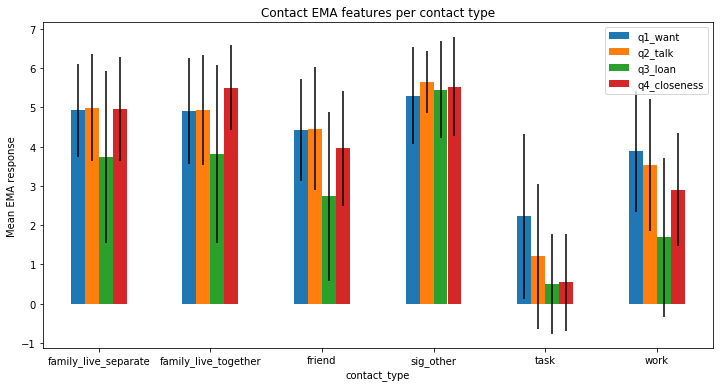

,q1_want,q2_talk,q3_loan,q4_closeness
contact_type,,,,
family_live_separate,4.927,4.997,3.740,4.954
family_live_together,4.915,4.943,3.813,5.496
friend,4.424,4.456,2.734,3.954
sig_other,5.296,5.650,5.450,5.527
task,2.222,1.210,0.503,0.545
work,3.880,3.532,1.693,2.909


,q1_want,q2_talk,q3_loan,q4_closeness
contact_type,,,,
family_live_separate,1.178,1.359,2.199,1.329
family_live_together,1.348,1.403,2.262,1.081
friend,1.297,1.572,2.151,1.472
sig_other,1.231,0.786,1.236,1.262
task,2.090,1.846,1.266,1.238
work,1.546,1.684,2.021,1.430


In [48]:
emc_features = ['q1_want', 'q2_talk', 'q3_loan', 'q4_closeness']

emc_features_mean.plot.bar(rot=0, yerr=emc_features_std)
plt.title("Contact EMA features per contact type")
plt.ylabel("Mean EMA response")
plt.show()

display(emc_features_mean)
display(emc_features_std)

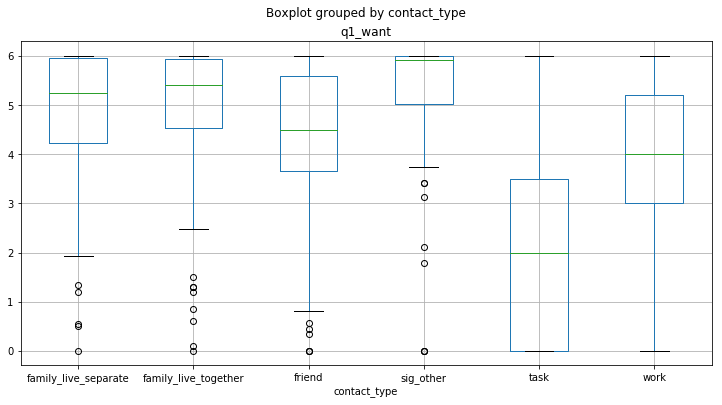

In [83]:
comm_features.boxplot(column='q1_want', by='contact_type')
plt.show()

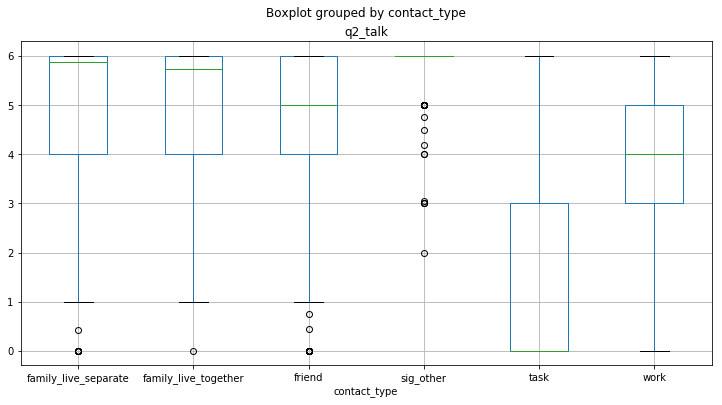

In [84]:
comm_features.boxplot(column='q2_talk', by='contact_type')
plt.show()

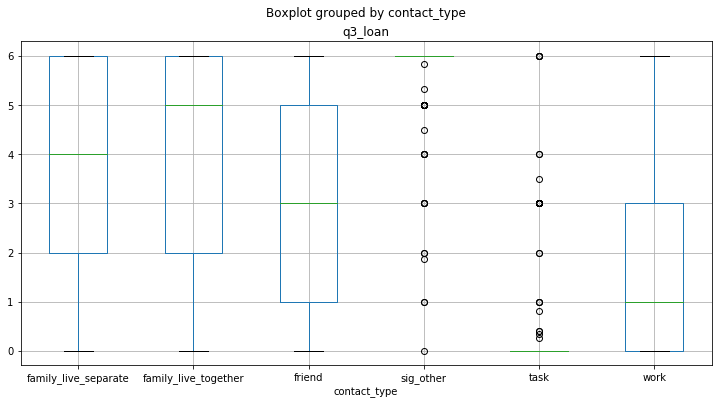

In [85]:
comm_features.boxplot(column='q3_loan', by='contact_type')
plt.show()

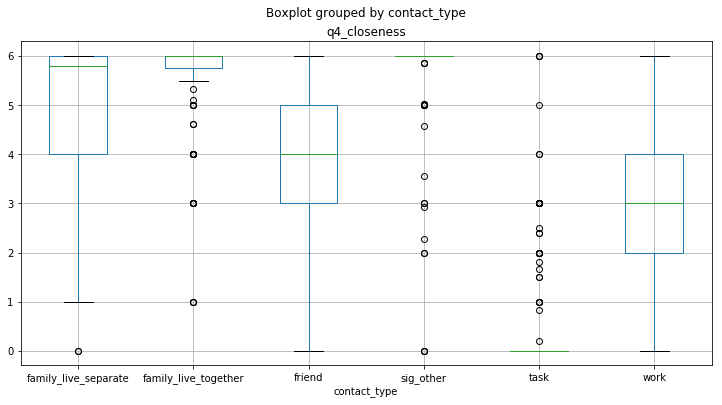

In [86]:
comm_features.boxplot(column='q4_closeness', by='contact_type')
plt.show()